In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Police Dataset**

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/207/policedata.csv')

distro of incidents below

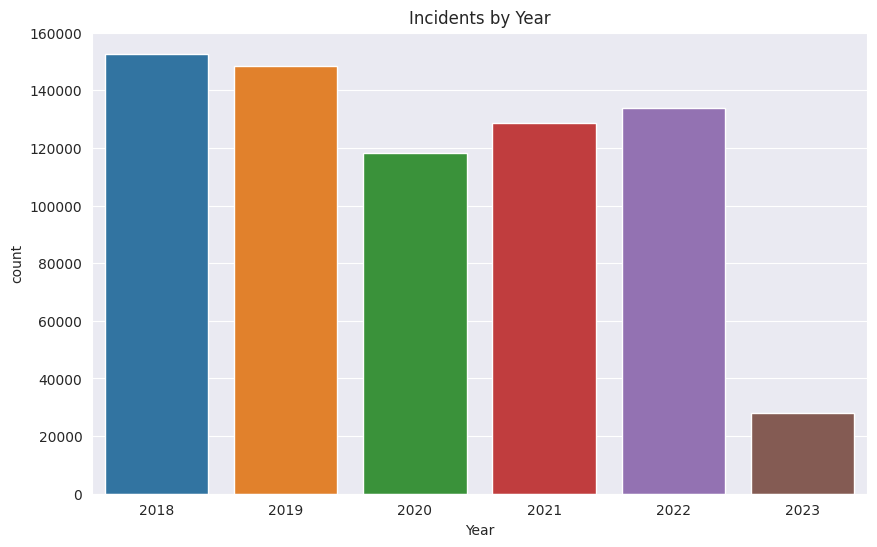

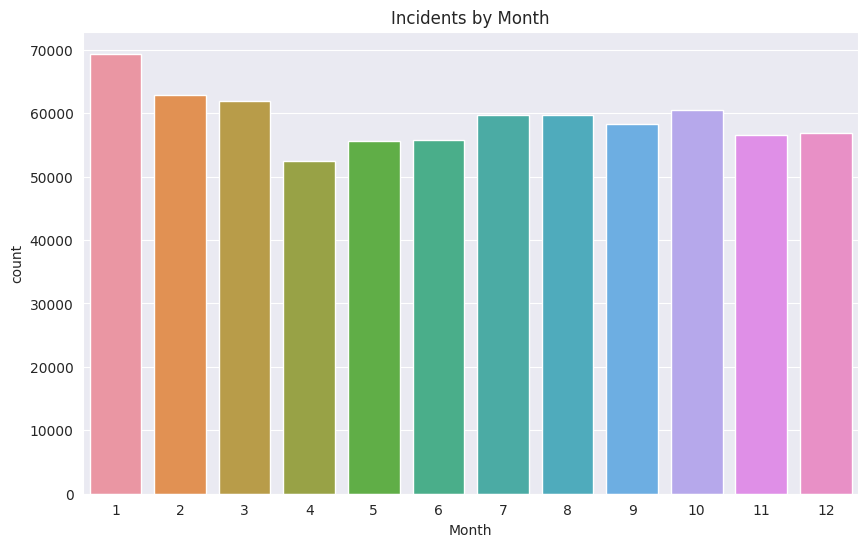

In [ ]:
data['Incident Date'] = pd.to_datetime(data['Incident Date']) # convert Incident Date column to datetime
data['Year'] = data['Incident Date'].dt.year # create a new Year column
data['Month'] = data['Incident Date'].dt.month # create a new Month column

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data)
plt.title('Incidents by Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=data)
plt.title('Incidents by Month')
plt.show()


different types of incidents?

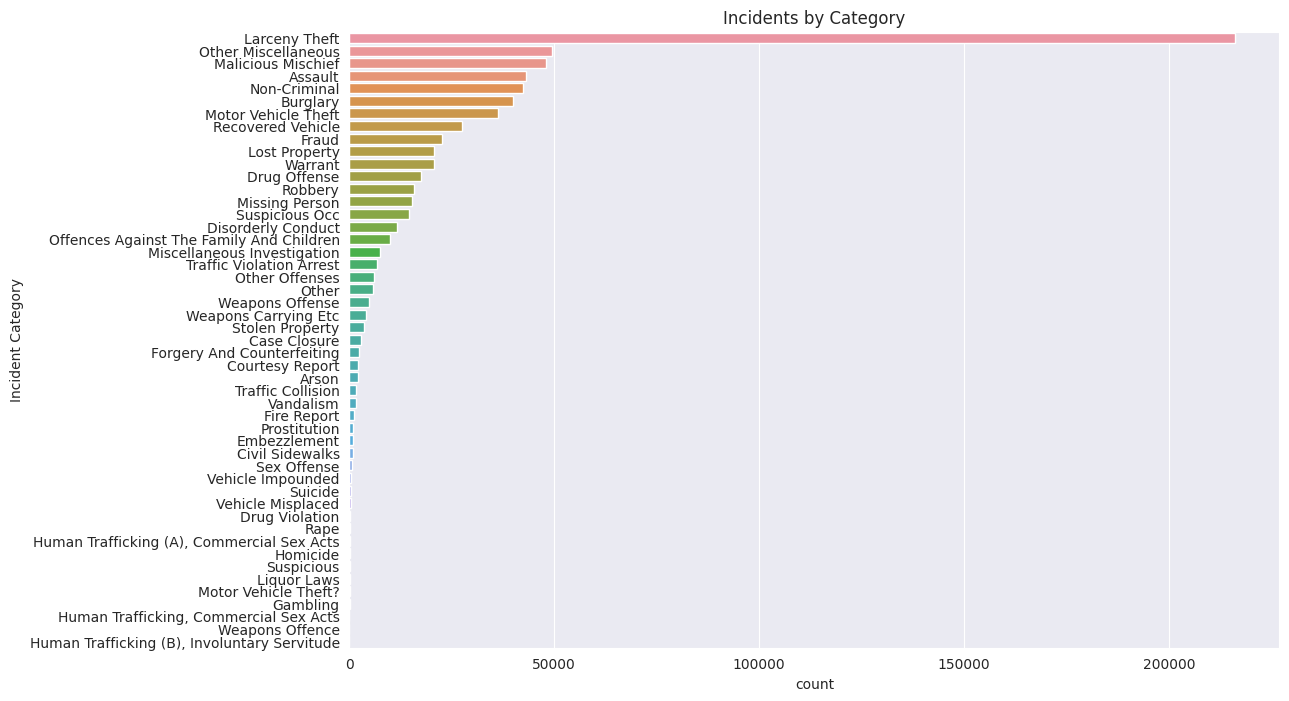

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Incident Category', data=data, order=data['Incident Category'].value_counts().index)
plt.title('Incidents by Category')
plt.show()

by district?

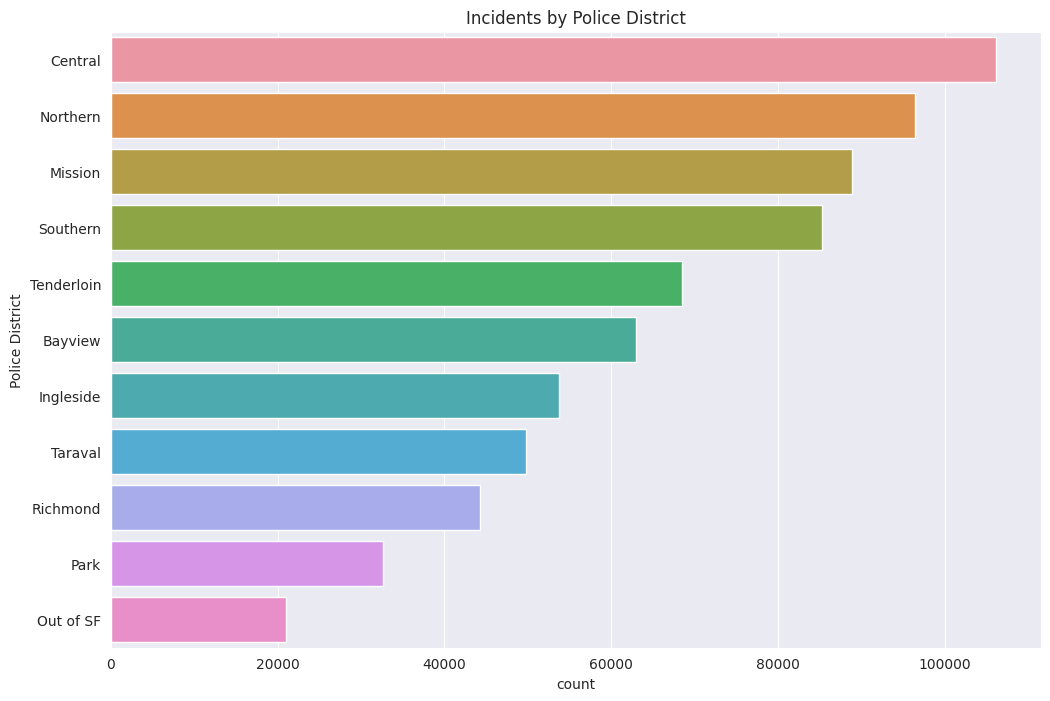

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Police District', data=data, order=data['Police District'].value_counts().index)
plt.title('Incidents by Police District')
plt.show()

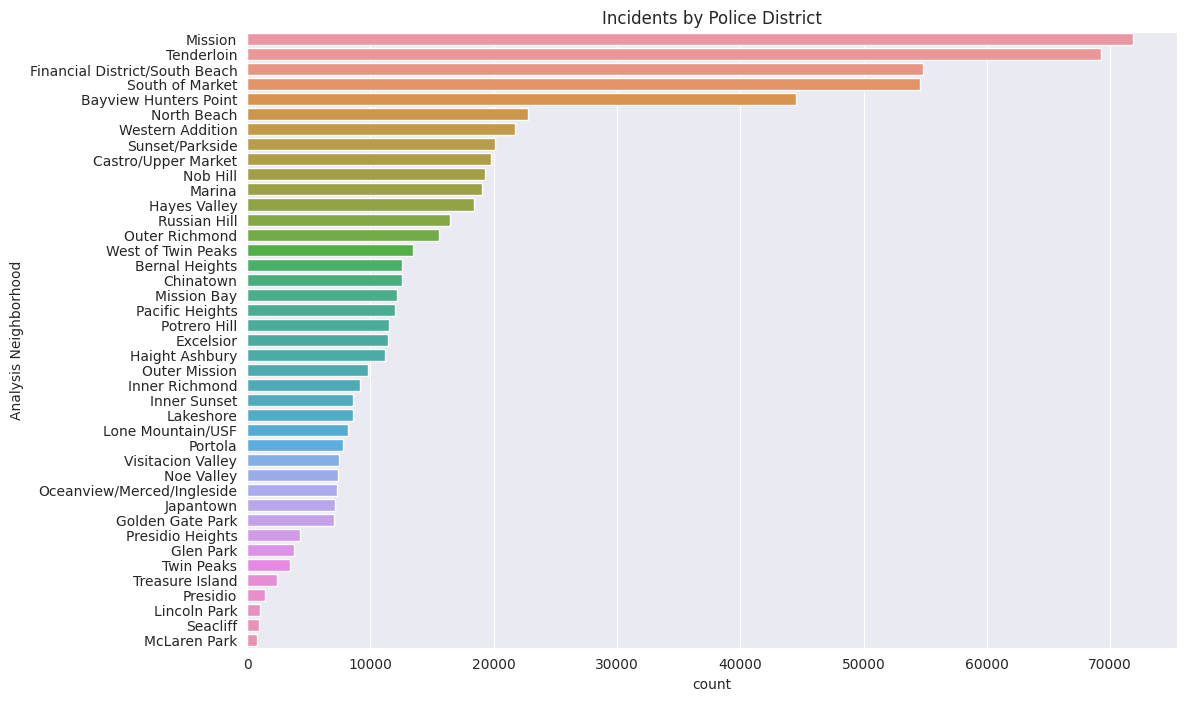

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Analysis Neighborhood', data=data, order=data['Analysis Neighborhood'].value_counts().index)
plt.title('Incidents by Police District')
plt.show()

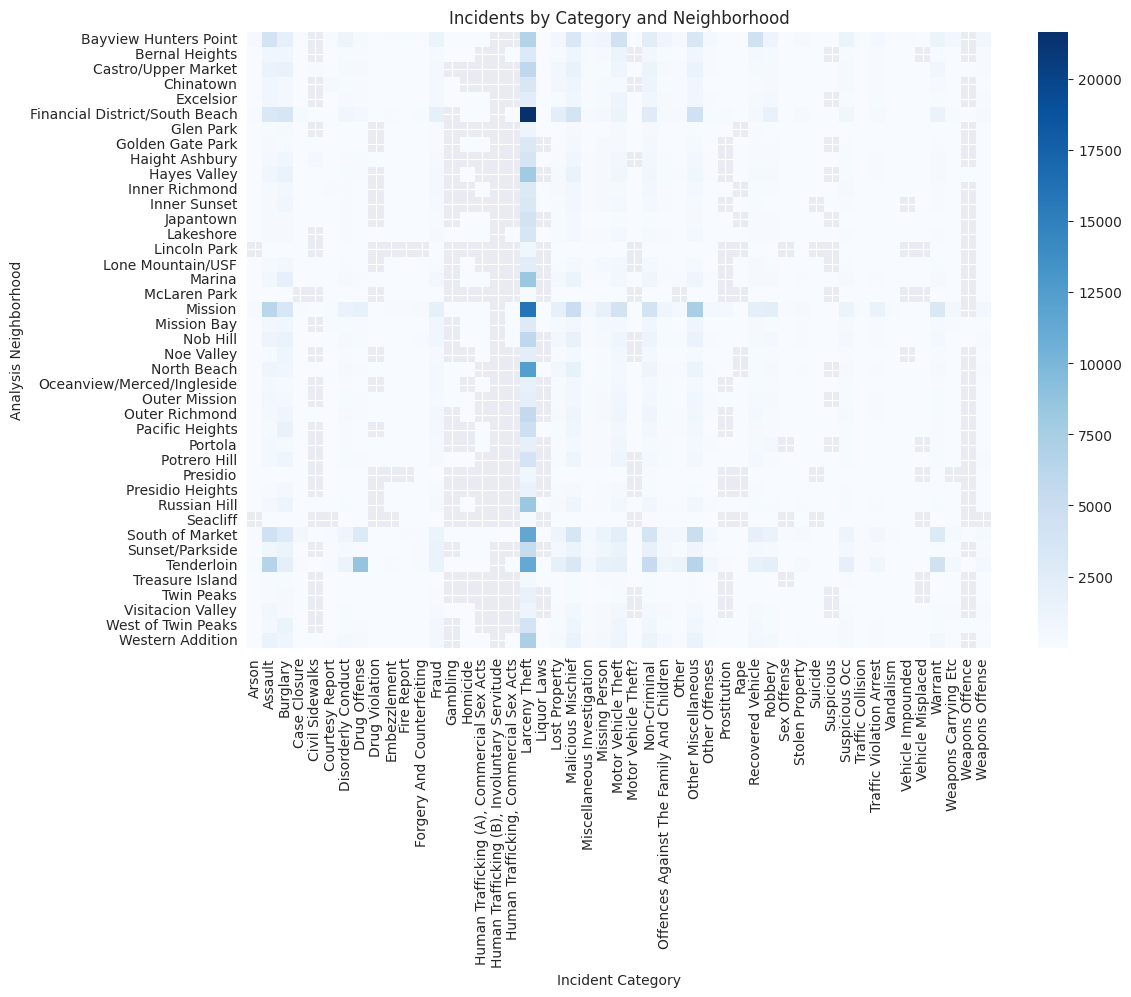

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.pivot_table(index='Analysis Neighborhood', columns='Incident Category', values='Incident ID', aggfunc='count'), cmap='Blues')
plt.title('Incidents by Category and Neighborhood')
plt.show()

<Figure size 1200x800 with 0 Axes>

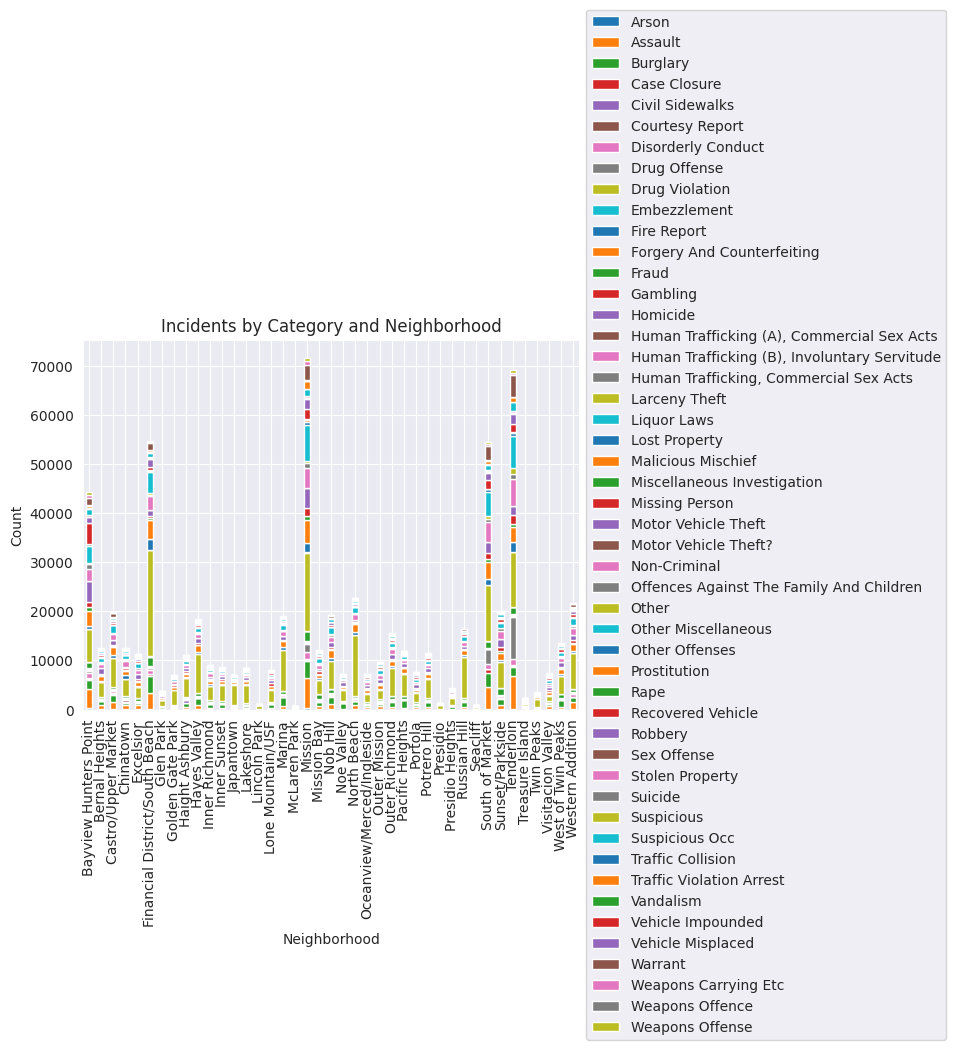

In [ ]:
df = data.groupby(['Analysis Neighborhood', 'Incident Category']).size().reset_index(name='count')

plt.figure(figsize=(12,8))
df.pivot(index='Analysis Neighborhood', columns='Incident Category', values='count').plot(kind='bar', stacked=True)
plt.title('Incidents by Category and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.show()

some relationships (or lack thereof?)

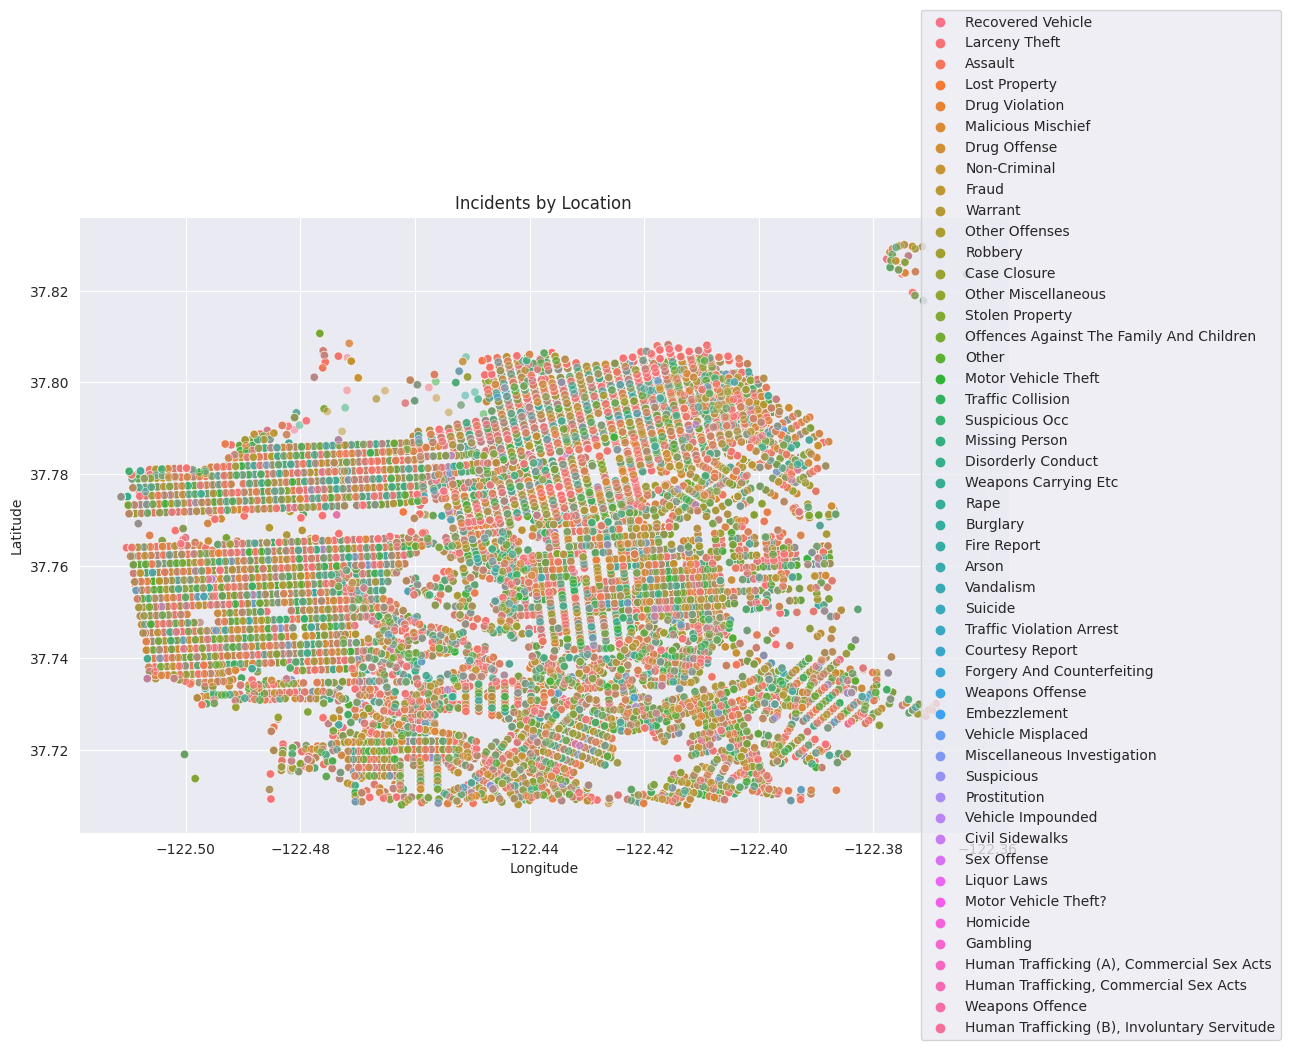

In [ ]:
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='Longitude', y='Latitude', hue='Incident Category', data=data, alpha=0.5, legend='brief')
scatterplot.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.title('Incidents by Location')
plt.show()

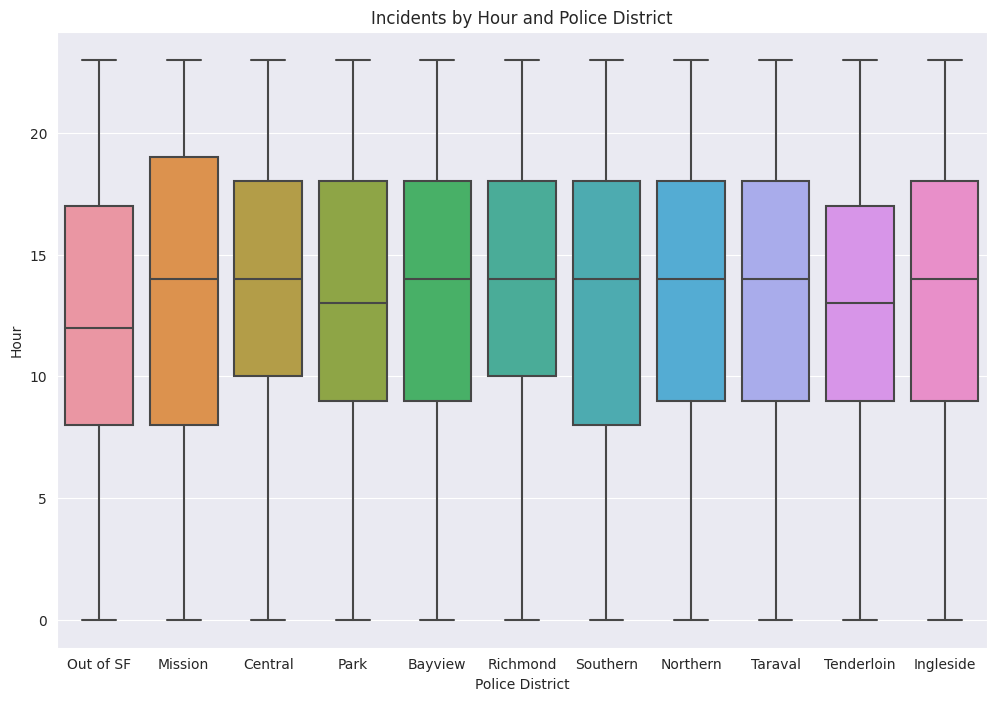

In [ ]:
data['Hour'] = pd.to_datetime(data['Incident Datetime']).dt.hour

plt.figure(figsize=(12, 8))
sns.boxplot(x='Police District', y='Hour', data=data)
plt.title('Incidents by Hour and Police District')
plt.show()

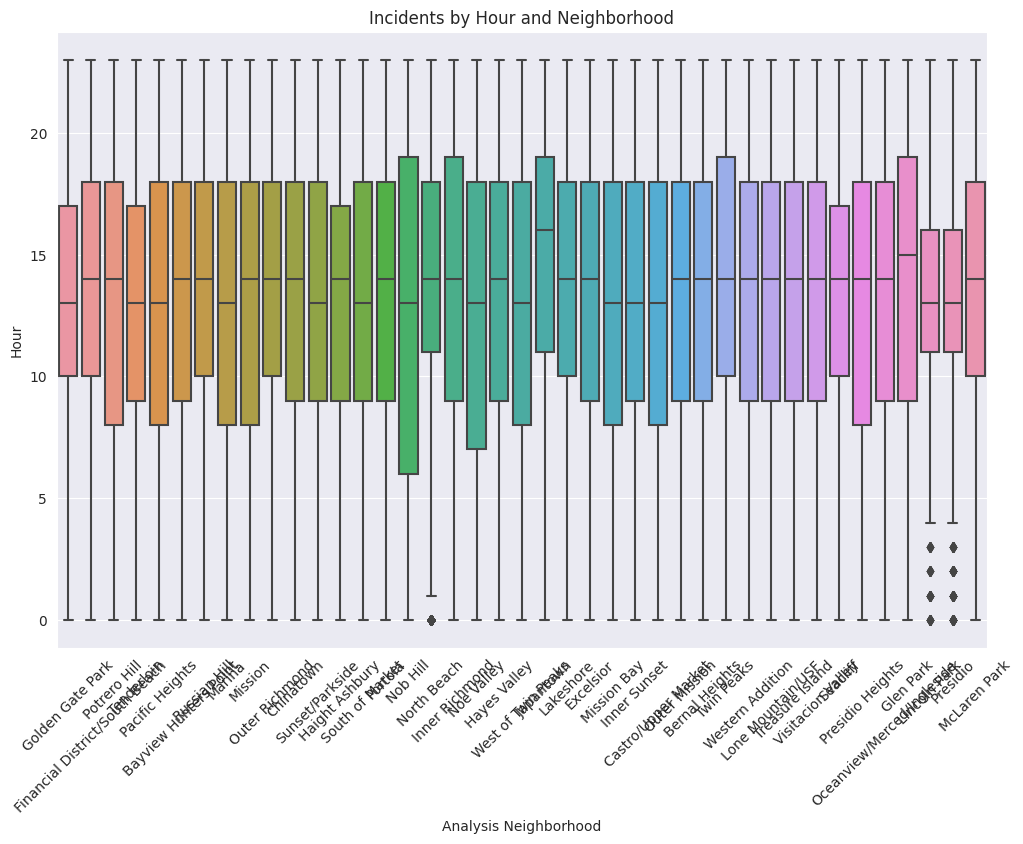

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Analysis Neighborhood', y='Hour', data=data)
plt.title('Incidents by Hour and Neighborhood')
plt.xticks(rotation=45)
plt.show()

# **Zillow Set**

In [ ]:
zillow = pd.read_csv(r'/content/drive/MyDrive/207/zillowdata.csv')

zillow = zillow[zillow["CountyName"] == "San Francisco County"]

In [ ]:
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
60,97567,60,94112,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,323296.498156,...,1.180449e+06,1.175436e+06,1.163572e+06,1.145611e+06,1.125003e+06,1.106909e+06,1.091036e+06,1.076806e+06,1.067184e+06,1.054970e+06
152,97565,152,94110,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,378177.716584,...,1.467983e+06,1.454308e+06,1.433074e+06,1.403490e+06,1.370913e+06,1.341495e+06,1.316538e+06,1.294348e+06,1.274899e+06,1.255267e+06
352,97576,352,94122,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,398069.523302,...,1.602467e+06,1.595666e+06,1.579818e+06,1.556028e+06,1.526830e+06,1.501166e+06,1.479061e+06,1.460331e+06,1.444289e+06,1.427643e+06
562,97564,562,94109,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,408678.931778,...,1.107698e+06,1.100819e+06,1.087776e+06,1.068124e+06,1.045789e+06,1.026423e+06,1.010855e+06,9.973988e+05,9.869056e+05,9.791691e+05
1230,97570,1230,94116,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,410178.110408,...,1.549038e+06,1.539274e+06,1.521418e+06,1.497291e+06,1.472184e+06,1.451855e+06,1.434325e+06,1.417224e+06,1.403078e+06,1.388301e+06


In [ ]:
zhvi_info = zillow.iloc[:, :9]
zhvi_values = zillow.loc[:, '2014-01-31':'2018-12-31']

In [ ]:
zhvi_values.head()

,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,...,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
60,651384.685831,654342.043214,659073.585610,665940.173609,672590.111937,6.791894e+05,6.834261e+05,6.888488e+05,6.955135e+05,7.037086e+05,...,9.939259e+05,1.002670e+06,1.014879e+06,1.025950e+06,1.031467e+06,1.031265e+06,1.028975e+06,1.030105e+06,1.030783e+06,1.030340e+06
152,914473.907896,929089.428058,945095.486851,965171.213904,983394.344552,1.000884e+06,1.011657e+06,1.021741e+06,1.033447e+06,1.050276e+06,...,1.369456e+06,1.377458e+06,1.390112e+06,1.402487e+06,1.405370e+06,1.401669e+06,1.396345e+06,1.396417e+06,1.396824e+06,1.394027e+06
352,831393.326992,836633.025028,844828.364825,856270.549469,866582.439310,8.761700e+05,8.829713e+05,8.890614e+05,8.950536e+05,9.022943e+05,...,1.296798e+06,1.309154e+06,1.325852e+06,1.340768e+06,1.345437e+06,1.341104e+06,1.336992e+06,1.337088e+06,1.337544e+06,1.332403e+06
562,796819.213884,809908.552309,822624.916274,835383.398126,847106.378217,8.589549e+05,8.631134e+05,8.655827e+05,8.712501e+05,8.841757e+05,...,1.055581e+06,1.060541e+06,1.067945e+06,1.072517e+06,1.071848e+06,1.069261e+06,1.069445e+06,1.072938e+06,1.076754e+06,1.077722e+06
1230,834206.279665,835851.861358,841825.966539,851504.638483,861899.498833,8.727645e+05,8.825251e+05,8.915321e+05,9.008676e+05,9.086665e+05,...,1.272834e+06,1.280756e+06,1.292886e+06,1.305187e+06,1.311752e+06,1.314426e+06,1.314754e+06,1.317453e+06,1.316689e+06,1.311634e+06


In [ ]:
print(zhvi_values["2014-01-31"].mean() , zhvi_values["2018-12-31"].mean())

922512.4956063624 1328980.0564710961


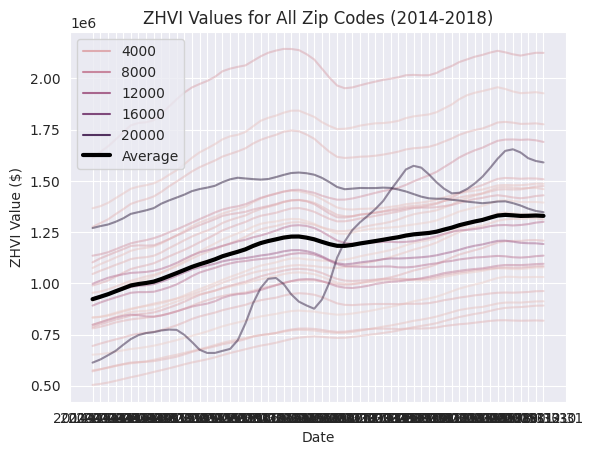

In [ ]:
zhvi_df = zhvi_values.stack().reset_index()
zhvi_df.columns = ['ZipCode', 'Date', 'ZHVI']

sns.lineplot(x='Date', y='ZHVI', hue='ZipCode', data=zhvi_df, alpha=0.5)

sns.lineplot(x=avg_zhvi.index, y=avg_zhvi.values, color='black', linewidth=3, label='Average')

plt.xlabel("Date")
plt.ylabel("ZHVI Value ($)")
plt.title("ZHVI Values for All Zip Codes (2014-2018)")

plt.show()

# **Survey Set**